<a href="https://colab.research.google.com/github/BenjamimOliveira/CN_TP1/blob/main/script/script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN - CN - TP1
----------------
## Imports

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import tensorflow.keras.optimizers as optimizers
import time
import zipfile

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Mount google drive


In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data
 

In [53]:
start_time = time.time()
!cp -r 'drive/MyDrive/UMinho/CN/dataset.zip' 'dataset.zip'
print("%s segundos" % ((time.time() - start_time)))

2.9626669883728027 segundos


In [54]:
start_time = time.time()
with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset_extr')
print("%s minutos" % ((time.time() - start_time)/60))

0.35484004418055215 minutos


In [55]:
train_dir = '/content/dataset_extr/dataset/train'
test_dir = '/content/dataset_extr/dataset/test'
valid_dir = '/content/dataset_extr/dataset/valid'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(64, 64),
    batch_size=32)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=(64, 64),
    batch_size=32)
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    seed=123,
    image_size=(64, 64),
    batch_size=32)

Found 35215 files belonging to 250 classes.
Found 1250 files belonging to 250 classes.
Found 1250 files belonging to 250 classes.


In [56]:
class_names = train_ds.class_names

## Auto Tune


In [57]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

## CNN

In [58]:
num_classes = 250

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(64, 64, 3)),
  layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compilar o modelo

In [59]:
opt = optimizers.SGD(learning_rate=0.01, momentum=0.9)
# Experimentar loss='sparse_categorical_crossentropy'
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Treinar o modelo

In [60]:
epochs=25
start_time = time.time()
with tf.device('/device:GPU:0'):
  history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=epochs
  )
print("%s minutos" % ((time.time() - start_time)/60))

Epoch 1/25
1101/1101 [==============================] - 31s 7ms/step - loss: 5.1193 - accuracy: 0.0427 - val_loss: 3.1867 - val_accuracy: 0.2688
Epoch 2/25
1101/1101 [==============================] - 5s 4ms/step - loss: 3.0291 - accuracy: 0.3233 - val_loss: 2.1724 - val_accuracy: 0.4936
Epoch 3/25
1101/1101 [==============================] - 4s 4ms/step - loss: 2.2228 - accuracy: 0.4777 - val_loss: 1.8410 - val_accuracy: 0.5440
Epoch 4/25
1101/1101 [==============================] - 4s 4ms/step - loss: 1.7737 - accuracy: 0.5704 - val_loss: 1.6882 - val_accuracy: 0.5704
Epoch 5/25
1101/1101 [==============================] - 4s 4ms/step - loss: 1.4412 - accuracy: 0.6365 - val_loss: 1.5642 - val_accuracy: 0.6200
Epoch 6/25
1101/1101 [==============================] - 4s 4ms/step - loss: 1.2037 - accuracy: 0.6919 - val_loss: 1.5886 - val_accuracy: 0.6064
Epoch 7/25
1101/1101 [==============================] - 4s 4ms/step - loss: 0.9857 - accuracy: 0.7415 - val_loss: 1.7161 - val_accuracy

## Prever

Em teoria o pássaro é um WILD TURKEY com 67.15 porcento de certeza mpt.


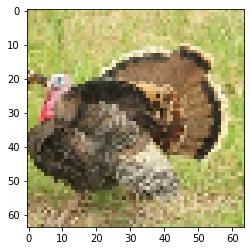

In [63]:
i=1
predictions = model.predict(test_ds)
score = tf.nn.softmax(predictions[i])

print(
    "Em teoria o pássaro é um {} com {:.2f} porcento de certeza mpt."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
plt.imshow(list(test_ds)[0][0][i]/255)
plt.show()